<h2 align="center">Лабораторна робота №6</h2>
<h5 align="right">Роботу виконав студент групи ФІ-21, Беркута Володимир</h5>
<p><b><i>Тема роботи:</i></b> "Ройовий інтелект для розв'язавання задачі пошуку параметрів нелінійної регресії".</p>
<p><b><i>Мета роботи:</i></b> опанувати методи й алгоритми ройового інтелекту для пошуку невідомих параметрів нелінійної регресійної моделі, вивчити основні недоліки класичних градієнтних методів для розв'язування такого роду нелінійих задач. Провести дослідження пошуку невідомих параметрів за класичними принципами машинного навчання.</p>

### Завдання до лабораторної роботи

- Обрати три будь-які варіанти з нелінійними регречійними моделями, математичні записи яких наведено у підроздлі 3.1. Взяти відповідні дані з файлу, який має назву "DataRegression.xlsx".
- Програмно перемішати дані для створення тренувальної (навчальної) та валідаційної (тестової) вибірок з метою здійчнення машинного навчання на основі методів й алгоритмів ройового інтелекту. Взяти дослідження 75% вибірки для навчання та залишкові 25% для верифікації процесу навчання (як варіант - можна взяти 80% / 20%).
- Програмно реалізувати метод диференціальної еволюції та алгоритм оптимізації роєм частинок для знаходження невідомих параметрів обраних трьох нелінійних регречійних моделей.
- У розробленому програмному забезпечення врахувати формування динаміки збіжності ітеративного процесу (на кожній ітерації) у вигляді представити після того, як програма закінчить свою роботу. Після виконання роботи програми представити графіки прогнозу на тестовій та навчальній вибірках (як це зроблено у підрозділі 2.3 даної роботи).
- Модифікувати програму так, щоб графіки, про які було згадано у 5-му пункті відображались в ході роботи програми. Графік оновлювати кожні K ітерацій роботи методу/алгоритму.

### Обрані варіанти

$$
\begin{array}{ll}
\text{Варіант №1} & \text{Варіант №2} & \text{Варіант №3}\\
y = b_1\cdot (1 - e^{-b_2\cdot x}) & y = \frac{e^{-b_1\cdot x}}{b_2 + b_3 \cdot x} & y = b_1\cdot e^{-b_2\cdot x} + b_3\cdot e^{-b_4\cdot x} + b_5 \cdot e^{-b_6 \cdot x} \\
b_1 \in [0; 100]; & b_i \in [0;1]; i=1;2;3. & b_i \in [0;1]; i=1;2;3 \\
b_2 \in [0; 1] &  & b_i \in [0;10]; i = 4;5;6
\end{array}
$$

## Імпорт бібліотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from SWRM import *

## Завнатаження даних

In [2]:
# Завантаження даних
data1 = pd.read_excel('DataRegression.xlsx', sheet_name='Var01')
data2 = pd.read_excel('DataRegression.xlsx', sheet_name='Var02')
data3 = pd.read_excel('DataRegression.xlsx', sheet_name='Var03')

### Дякі махінації з даними

In [3]:
# Перемішування та розділення
def get_trainNtest(data):
    return train_test_split(data['x'].values, 
                            data['y'].values, test_size=0.25, shuffle=True)


In [4]:
X_train1, X_test1, y_train1, y_test1 = get_trainNtest(data1)
X_train2, X_test2, y_train2, y_test2 = get_trainNtest(data2)
X_train3, X_test3, y_train3, y_test3 = get_trainNtest(data3)

## Ініціалізація моделей

In [5]:
def model1(params, x):
    b1, b2 = params
    return b1 * (1 - np.exp(-b2 * x))

bounds1 = np.array([[0, 100], [0, 1]])

In [6]:
def model2(params, x):
    b1, b2, b3 = params
    return np.exp(-b1 * x) / (b2 + b3 * x)

bounds2 = np.array([[0, 1], [0, 1], [0, 1]])

In [7]:
def model3(params, x):
    b1, b2, b3, b4, b5, b6 = params
    return b1 * np.exp(-b2 * x) + b3 * np.exp(-b4 * x) + b5 * np.exp(-b6 * x)

bounds3 = np.array([[0, 1], [0, 1], [0, 1], 
                    [0, 10], [0, 10], [0, 10]])

In [8]:
def mse(model, params, X, y):
    return np.mean((model(params, X) - y)**2)

In [9]:
# from test_de import *

# differential_evolution_test(lambda p: mse(model1, p, X_train1, y_train1), bounds1)

In [10]:
# Навчання моделей
def train(model, data, bounds):
    X_train, X_test, y_train, y_test = get_trainNtest(data)
    
    pos_de, best_de = differential_evolution(lambda p: mse(model, p, X_train, y_train), bounds)
    # pos_de, best_de = DE(function=lambda p: mse(model, p, X_train, y_train), limits=bounds)
    pos_pso, best_pso = pso(lambda p: mse(model, p, X_train, y_train), bounds)

    # Візуалізація результатів
    plt.figure(figsize=(15, 6))

    # Прогнози
    plt.subplot(1, 2, 1)
    
    plt.scatter(X_train, y_train, label='Тренування', alpha=0.6)
    plt.scatter(X_test, y_test, label='Тест', alpha=0.6)
    plt.title("Задані точки, та функція регресії")
    plt.grid()

    X = data['x'].values.reshape(-1, 1)
    
    x_plot = np.linspace(X.min(), X.max(), 100)
    plt.plot(x_plot, model(pos_de[-1], x_plot), 'r--', label='DE')
    plt.plot(x_plot, model(pos_pso[-1], x_plot), 'g--', label='PSO')
    plt.legend()

    # Збіжність
    plt.subplot(1, 2, 2)
    plt.plot([mse(model, p, X_train, y_train) for p in pos_de], label='DE')
    plt.plot([mse(model, p, X_train, y_train) for p in pos_pso], label='PSO')
    plt.title("Графік збіжності")
    plt.grid()
    plt.yscale('log')
    plt.xlabel('Ітерації')
    plt.ylabel('MSE')
    plt.legend()

    plt.tight_layout()
    plt.show()

    
    
    # Вивід результатів
    print('Параметри DE:', pos_de[-1])
    print('Параметри PSO:', pos_pso[-1])
    print('DE тест MSE:', mse(model, pos_de[-1], X_test, y_test))
    print('PSO тест MSE:', mse(model, pos_pso[-1], X_test, y_test))
    
    return pos_de, best_de, pos_pso, best_pso

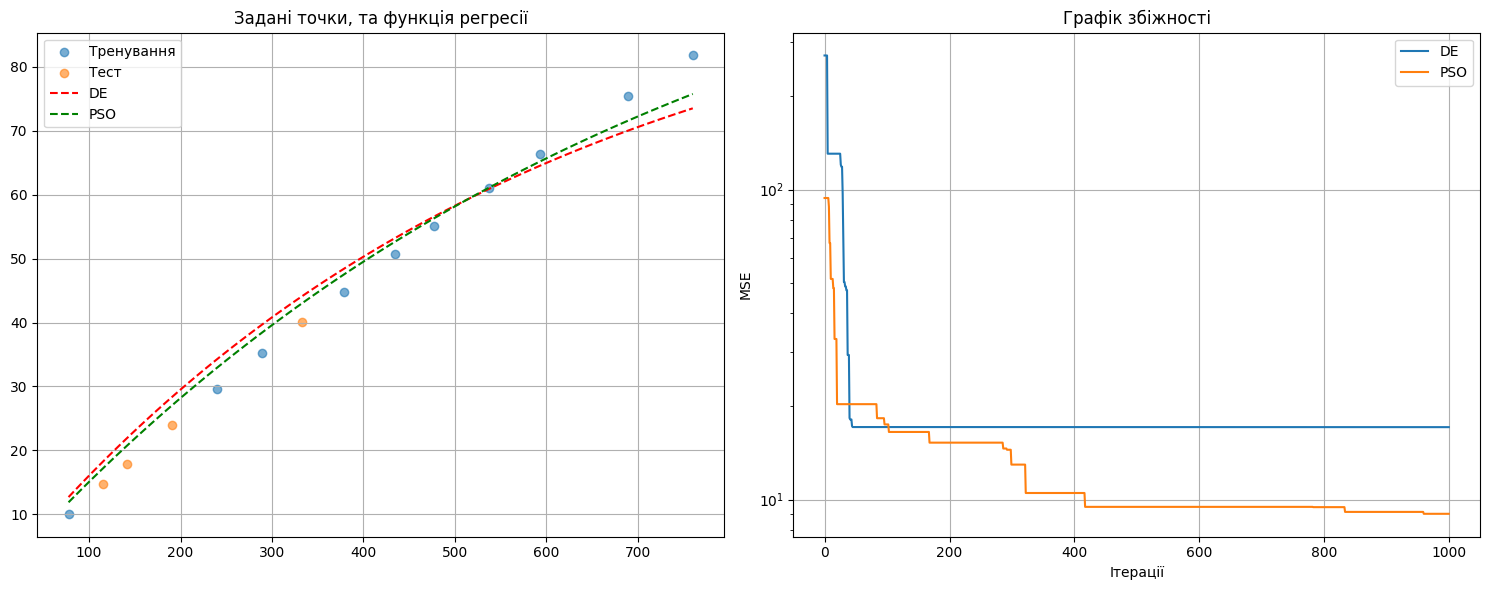

Параметри DE: [1.00000000e+02 1.74807795e-03]
Параметри PSO: [1.16203207e+02 1.38865744e-03]
DE тест MSE: 15.932242973029913
PSO тест MSE: 7.97629703849106


In [11]:
pos_de1, best_de1, pos_pso1, best_pso1 = train(model1, data1, bounds1)

C:\Users\berku\AppData\Local\Temp\ipykernel_41644\1662496042.py:3: RuntimeWarning: divide by zero encountered in divide
  return np.exp(-b1 * x) / (b2 + b3 * x)


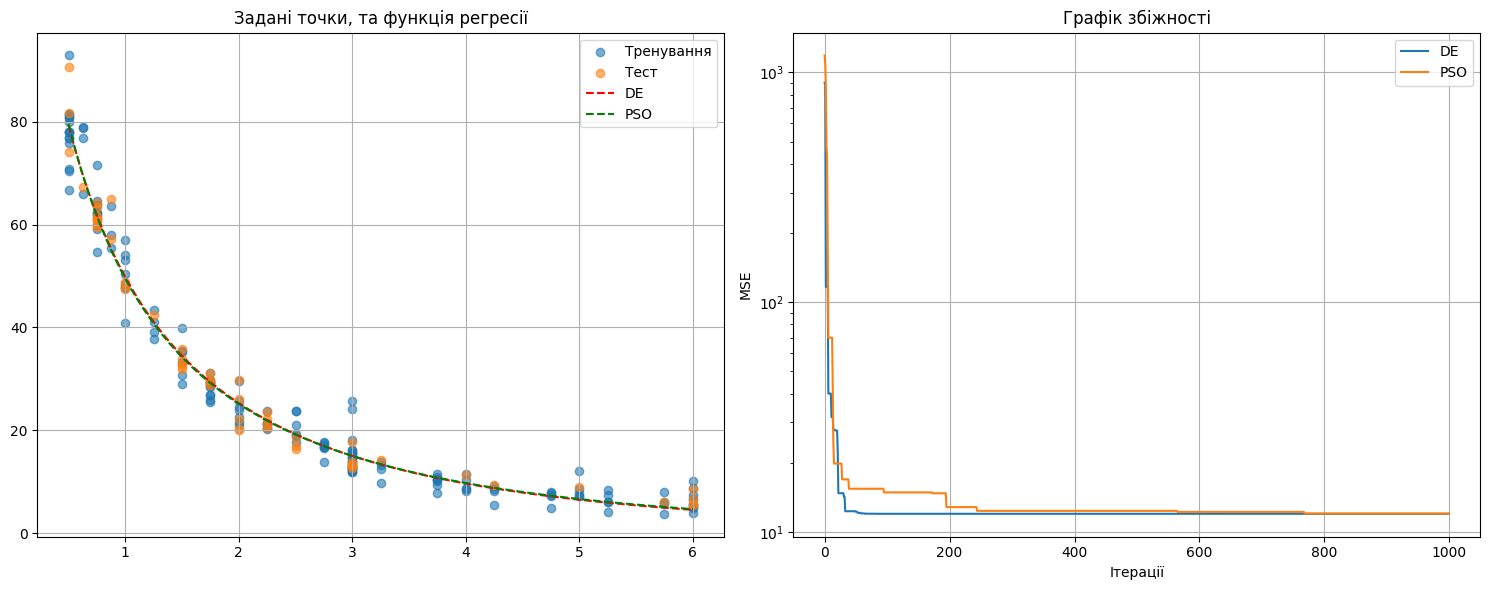

Параметри DE: [0.19957706 0.00637185 0.0100782 ]
Параметри PSO: [0.18623726 0.00611312 0.01065961]
DE тест MSE: 8.743093295818436
PSO тест MSE: 8.546307358054149


In [12]:
pos_de2, best_de2, pos_pso2, best_pso2 = train(model2, data2, bounds2)

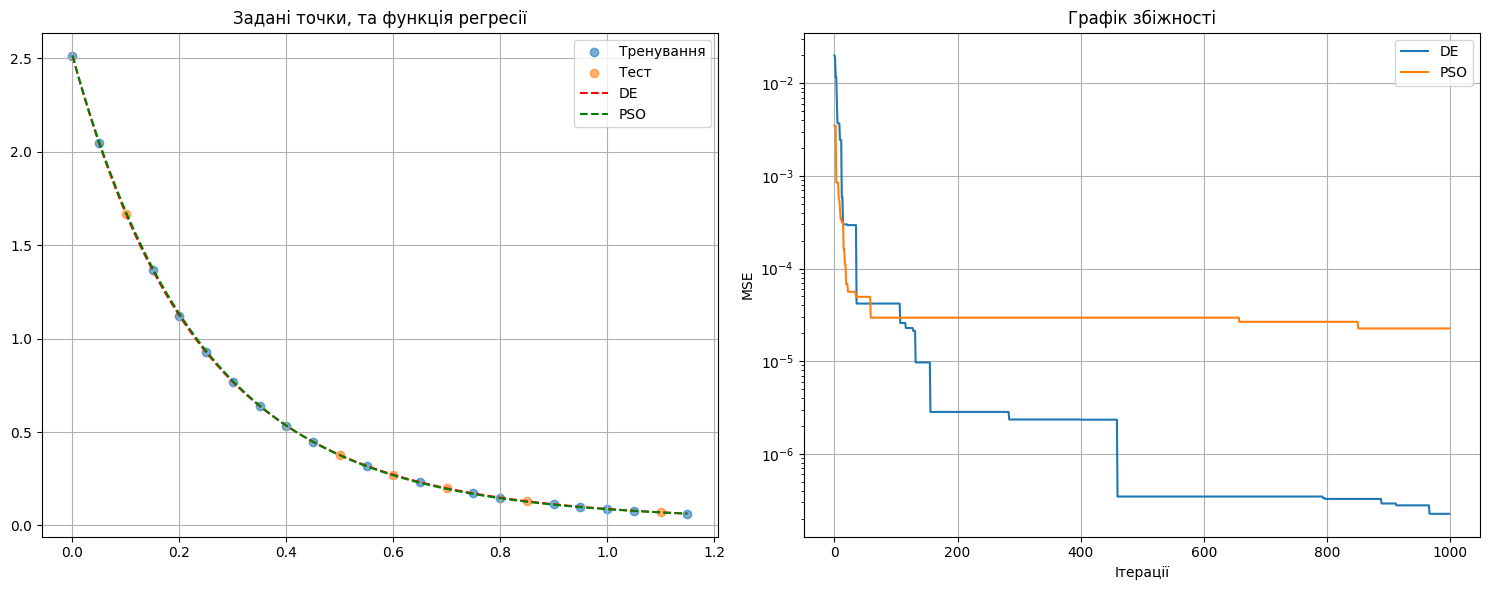

Параметри DE: [0.12088731 1.         0.64646438 6.04921604 1.74703436 3.71474157]
Параметри PSO: [0.08581033 0.69177889 0.44480842 5.95344294 1.98447512 3.83024019]
DE тест MSE: 3.5148874197399526e-07
PSO тест MSE: 2.3423530341104565e-05


In [13]:
pos_de3, best_de3, pos_pso3, best_pso3 = train(model3, data3, bounds3)